<center><h2>ФБ-33 Стогнійчук Інна</h2>
<h3>Лабораторна робота №5</h3>
<h3>Візуалізація даних</h3>
<h3>Завдання 1, 2</h3></center>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, CheckButtons, RadioButtons
from scipy.signal import iirfilter, filtfilt

### Початкові значення

In [2]:
 
amplitude_init = 1
frequency_init = 1
phase_init = 0
noise_mean_init = 0
noise_covariance_init = 0.1
show_noise_init = True
noise_init = np.random.normal(0, 1, 1000)


<ul>
  <li><strong>Реалізуйте функцію harmonic_with_noise</strong>, яка приймає наступні параметри:</li>
  <ul>
    <li><strong>amplitude</strong> - амплітуда гармоніки.</li>
    <li><strong>frequency</strong> - частота гармоніки.</li>
    <li><strong>phase</strong> – фазовий зсув гармоніки.</li>
    <li><strong>noise_mean</strong> - амплітуда шуму.</li>
    <li><strong>noise_covariance</strong> – дисперсія шуму.</li>
    <li><strong>show_noise</strong> - флаг, який вказує, чи слід показувати шум на графіку.</li>
  </ul>
</ul>


In [3]:
def harmonic_with_noise(t, amplitude, frequency, phase, noise_mean, noise_covariance, show_noise):
    harmonic_signal = amplitude * np.sin(2 * np.pi * frequency * t + phase) #y(t) = A ∗ sin(ω ∗ t + φ)
    if show_noise:
        scaled_noise = noise_mean + np.sqrt(noise_covariance) * noise_init
        harmonic_signal += scaled_noise
    return harmonic_signal

<p>Початкові значення для фільтру</p>

In [4]:
order = 5
fs_init = 1000.0  
cutoff_frequency_init = 100.0 

<p>Отриману гармоніку з накладеним на неї шумом відфільтруйте за допомогою фільтру на ваш вибір (наприклад <a href="https://docs.scipy.org/doc/scipy/reference/signal.html">scipy.signal.iirfilter</a>).</p>
<p>Відфільтрована гармоніка має бути максимально близька до «чистої».Фільтр Баттерворта має плавний перехід між пасовою та забороненою зонами частот. Це означає, що він може плавно приглушувати частоти поза пасовим діапазоном, зберігаючи при цьому кращу можливу амплітуду для частот у пасовій зоні.</p>


<p><strong>fs:</strong> частота дискретизації сигналу.</p>
<p><strong>cutoff_frequency:</strong> частота зрізу.</p>
<p><strong>order:</strong> порядок фільтра (за замовчуванням 5). Порядок фільтра Баттерворта визначає, наскільки швидко фільтр втрачає сигнал поза пасовою смугою. Вищий порядок фільтра призводить до більшого загального приглушення сигналу поза пасовою зоною.</p>
<p>filtfilt(b, a, y) функція двічі застосовує лінійний цифровий фільтр, один раз вперед і один раз назад. Комбінований фільтр має нульову фазу та порядок фільтра, який вдвічі перевищує вихідний.</p>

In [6]:
def filtered_signal(y, fs, cutoff_frequency, order=5):
    b, a = iirfilter(order, cutoff_frequency / (fs / 2), btype='low', ftype='butter')
    filtered = filtfilt(b, a, y)

    return filtered

<p>Після оновлення параметрів програма повинна одразу оновлювати графік функції гармоніки з накладеним шумом згідно з виставленими параметрами.</p>

In [7]:
def update(val):
    amplitude = amp_slider.val
    frequency = freq_slider.val
    phase = phase_slider.val
    noise_mean = noise_mean_slider.val
    noise_covariance = noise_cov_slider.val
    show_noise = show_noise_check.get_status()[0]
    fs = fs_slider.val
    cutoff_frequency = cutoff_frequency_slider.val

    y = harmonic_with_noise(t, amplitude, frequency, phase, noise_mean, noise_covariance, show_noise)
    l.set_ydata(y)

    if show_filter_check.get_status()[0]:
        filtered = filtered_signal(y, fs, cutoff_frequency, order)
        l_filtered.set_ydata(filtered)
    else:
        l_filtered.set_ydata(np.zeros_like(y)) 
    fig.canvas.draw_idle()


#### Поле для графіку функції (plot), задання параметрів фігури

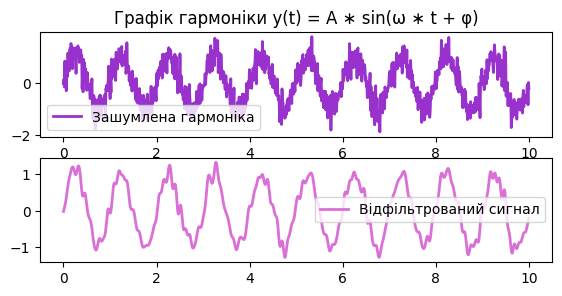

In [8]:
# часова вісь
t = np.linspace(0, 10, 1000)
y = harmonic_with_noise(t, amplitude_init, frequency_init, phase_init, noise_mean_init, noise_covariance_init, show_noise_init)
filtered = filtered_signal(y, fs_init, cutoff_frequency_init, order)

fig, (ax1, ax2) = plt.subplots(2, 1)
plt.subplots_adjust(left=0.1, bottom=0.4)
l, = ax1.plot(t, y, lw=2, color='darkorchid', label='Зашумлена гармоніка')
l_filtered, = ax2.plot(t, filtered, lw=2, color='orchid', label='Відфільтрований сигнал')
ax1.set_title('Графік гармоніки y(t) = A ∗ sin(ω ∗ t + φ)')
ax1.legend()
ax2.legend()

#### Слайдери (sliders), які відповідають за амплітуду, частоту гармоніки, а також слайдери для параметрів шуму

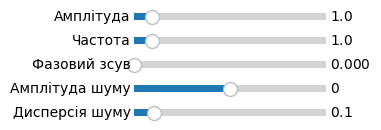

In [9]:
# слайдери для керування параметрами
amp_slider = Slider(plt.axes([0.1, 0.3, 0.3, 0.03]), 'Амплітуда', valmin=0.1, valmax=10, valinit=amplitude_init)
freq_slider = Slider(plt.axes([0.1, 0.25, 0.3, 0.03]), 'Частота', valmin=0.1, valmax=10, valinit=frequency_init)
phase_slider = Slider(plt.axes([0.1, 0.2, 0.3, 0.03]), 'Фазовий зсув', valmin=0, valmax=2*np.pi, valinit=phase_init)
noise_mean_slider = Slider(plt.axes([0.1, 0.15, 0.3, 0.03]), 'Амплітуда шуму', valmin=-1, valmax=1, valinit=noise_mean_init)
noise_cov_slider = Slider(plt.axes([0.1, 0.1, 0.3, 0.03]), 'Дисперсія шуму', valmin=0, valmax=1, valinit=noise_covariance_init)


#### Слайдери (sliders), які відповідають за параметри для фільтра

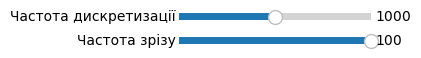

In [10]:
fs_slider = Slider(plt.axes([0.55, 0.3, 0.3, 0.03]), 'Частота дискретизації', valmin=1, valmax=2000, valinit=fs_init)
cutoff_frequency_slider = Slider(plt.axes([0.55, 0.25, 0.3, 0.03]), 'Частота зрізу', valmin=1, valmax=100, valinit=cutoff_frequency_init)

#### Функція для кнопки «Reset», яка відновлює початкові параметри. Після натискання кнопки «Reset», мають відновитись початкові параметри

In [11]:

# функція reset
def reset(event):
    amp_slider.reset()
    freq_slider.reset()
    phase_slider.reset()
    noise_mean_slider.reset()
    noise_cov_slider.reset() 
    fs_slider.reset()
    cutoff_frequency_slider.reset()
    global noise_init
    noise_init = np.random.normal(0, 1, 1000)


#### Чекбокс для перемикання відображення шуму на гармоніці, відображення фільтрованого графіку та кнопки скидання параметрів до початкового стану.

0

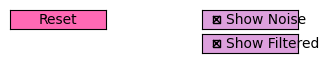

In [12]:
color = 'plum'

# чекбокс фільтру
rax_filter = plt.axes([0.8, 0.1, 0.15, 0.04], facecolor=color)
show_filter_check = CheckButtons(rax_filter, ['Show Filtered'], [True])

# чекбокс  шуму
rax = plt.axes([0.8, 0.15, 0.15, 0.04], facecolor=color)
show_noise_check = CheckButtons(rax, ['Show Noise'], [show_noise_init])

# кнопка reset
resetax = plt.axes([0.5, 0.15, 0.15, 0.04])
button = Button(resetax, 'Reset', color='hotpink', hovercolor='0.975')
button.on_clicked(reset)

#### Обробники подій до слайдерів і чекбокса

In [14]:

amp_slider.on_changed(update)
freq_slider.on_changed(update)
phase_slider.on_changed(update)
noise_mean_slider.on_changed(update)
noise_cov_slider.on_changed(update)

show_noise_check.on_clicked(update)
button.on_clicked(reset)
show_filter_check.on_clicked(update)

fs_slider.on_changed(update)
cutoff_frequency_slider.on_changed(update)

plt.show()